In [2]:
import sys
sys.path.append('../')

In [3]:
import ctn_benchmark

%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from hyperopt import fmin, hp, tpe, Trials, rand
import pickle
import hyperopt

In [4]:
import wm_benchmark_00
reload(wm_benchmark_00)

<module 'wm_benchmark_00' from '../wm_benchmark_00.pyc'>

In [ ]:
def objective(x):
    vals = wm_benchmark_00.Working_Memory().run(
        #input_scale = x['input_scale'],
        #intercept_low = x['intercept_low'],
        #intercept_high = x['intercept_high'],
        #tau_input = x['tau_input'],
        #tau_recurrent = x['tau_recurrent'],
        #tau_reset = x['tau_reset'],
        max_rate_high = x['max_rate_high'],
        max_rate_low = x['max_rate_low']
    )
    return{
        'loss':
            abs(vals['act_510'] - 28) + abs(vals['act_1750'] - 33) + abs(vals['peak'] - 53),
        'status':hyperopt.STATUS_OK,
    }
trials = Trials()
best = fmin(objective,
           space = {#'input_scale':hp.uniform('input_scale', 0.1, 10),
                    #'intercept_low':hp.uniform('intercept_low', -0.5, 0.5),
                    #'intercept_high':hp.uniform('intercept_high', 0.5, 1.0),
                    #'tau_input':hp.uniform('tau_input', 0.002, 0.2),
                    #'tau_recurrent':hp.uniform('tau_recurrent', 0.002, 0.2),
                    #'tau_reset':hp.uniform('tau_reset', 0.002, 0.2),
                    'max_rate_high':hp.uniform('max_rate_high', 150, 250),
                    'max_rate_low':hp.uniform('max_rate_low', 100, 150)
                   },
           algo = hyperopt.tpe.suggest,
           max_evals = 100,
           trials = trials
           )
pickle.dump({'Trials':trials, 'Best':best}, open('wm_data_max_rates', 'w'))

In [7]:
print(best)

{'max_rate_high': 239.84385012093054, 'max_rate_low': 122.79637437908838}


In [10]:
import pandas
import seaborn as sns
data = ctn_benchmark.Data('data')
df = pandas.DataFrame(data.data)
df = df[df._input_scale == 0.38314316705290097]
df = df[df._intercept_low == -0.4989080091138938]
df = df[df._tau_reset == 0.1376503648029975]
df = df[df._tau_input == 0.009683186948674292]
df = df[df._tau_recurrent == 0.1959772077772586]

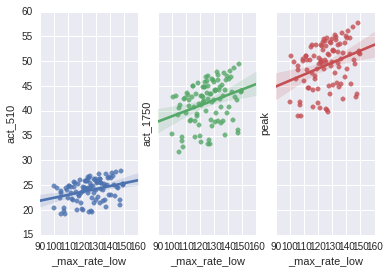

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, sharey = True)
x = '_max_rate_low'
sns.regplot(x, y = 'act_510', ax = ax1, data = df)
sns.regplot(x, y = 'act_1750', ax = ax2, data = df)
sns.regplot(x, y = 'peak', ax = ax3, data = df)

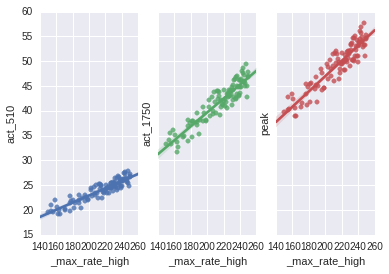

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, sharey = True)
x = '_max_rate_high'
sns.regplot(x, y = 'act_510', ax = ax1, data = df)
sns.regplot(x, y = 'act_1750', ax = ax2, data = df)
sns.regplot(x, y = 'peak', ax = ax3, data = df)

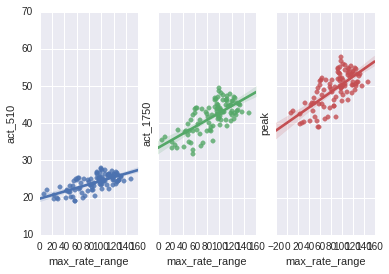

In [15]:
df['max_rate_range'] = df['_max_rate_high']-df['_max_rate_low']
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, sharey = True)
x = 'max_rate_range'
sns.regplot(x, y = 'act_510', ax = ax1, data = df)
sns.regplot(x, y = 'act_1750', ax = ax2, data = df)
sns.regplot(x, y = 'peak', ax = ax3, data = df)